In [1]:
import pandas as pd

In [4]:
dataset = pd.read_csv("Exp_3_HDA_heart.csv")

In [5]:
dataset=dataset.drop_duplicates()

In [6]:
dataset.shape

(302, 14)

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [11]:
X = dataset.drop("target", axis=1)
y = dataset["target"]


In [12]:
le = LabelEncoder()
le.fit(y)
Y=le.transform(y)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size=0.3, random_state=42)


Linear Regression
Test Accuracy: 0.85
Confusion Matrix:
[[86  7  0]
 [22 84  1]
 [ 0  0  0]]

Logistic Regression
Test Accuracy: 0.85
Confusion Matrix:
[[85  8]
 [21 86]]

Naïve Bayes
Test Accuracy: 0.80
Confusion Matrix:
[[84  9]
 [32 75]]

Decision Tree
Test Accuracy: 0.88
Confusion Matrix:
[[86  7]
 [18 89]]

Neural Network
Test Accuracy: 0.82
Confusion Matrix:
[[78 15]
 [20 87]]


/Users/Neha_Kohli/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


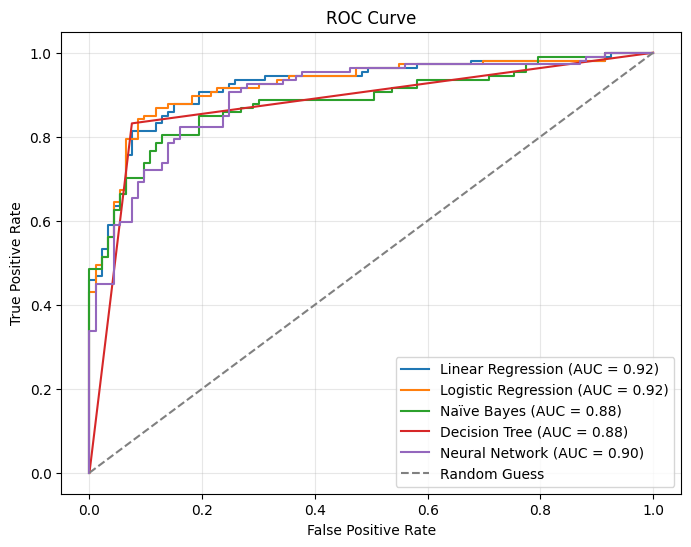

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, Y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1200),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Plot ROC Curve
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    predictions = model.predict(X_test)

    # Get score for ROC curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.predict(X_test)  # For Linear Regression

    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    # Accuracy & Confusion Matrix
    accuracy = accuracy_score(Y_test, np.round(predictions))
    cm = confusion_matrix(Y_test, np.round(predictions))

    print(f"\n{model_name}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{cm}")

# Plot a random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
